# Augmentacja


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# AUGMENTACJA DANYCH

Jak państwo mogli zauważyć, w przypadku zbiorów separowalnych liniowo model perceptron daje w zależności od początkowej inicjalizacji różne wyniki. W związku z tym powstaje pytanie, która separacja będzie najlepsza. Otóż jednym z podejść, jest zrobienie takiej bariery która jest najdalsza od obu zbiorów (czyli możemy ją maksymalnie nadmuchać, i ciągle będzie rozdzielała).

Równoważnie możemy powiedzieć, że najlepsza bariera to jest ta, która rozdziela poprawnie nadmuchane punkty (czyli zamiast punktów bierzemy kulki).

W praktyce w sieciach stosuje się to podejście używając augmentacji, czyli w trakcie uczenia modelu nie wkładamy punktu do modelu, lecz jego niewielkie (losowe) zaburzenie. Jak nauczymy w ten sposób model, to możemy mieć nadzieję, że będzie lepiej generalizował.

ZADANIE:
proszę napisać taki upgrade modelu perceptrona, by przy uczeniu przyjmował losowe zaburzenia punktów, czylu zastępował punkt x punktem x+noise, gdzie noise pochodzi z rozkładu normalnego o średniej zero, i małym odchyleniu standardowym.

<ipython-input-4-f5e1a37a0fa8>:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='x',alpha=0.5)


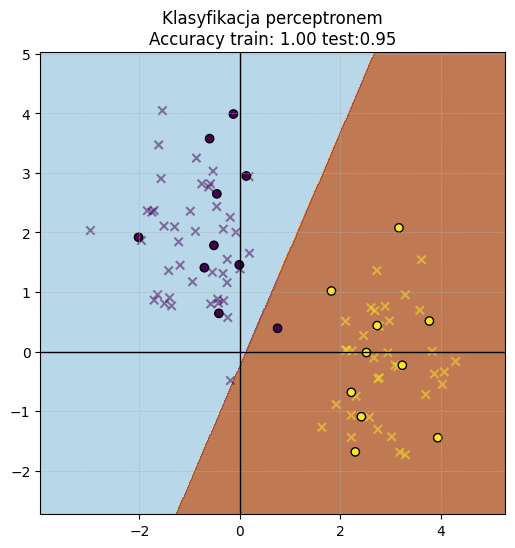

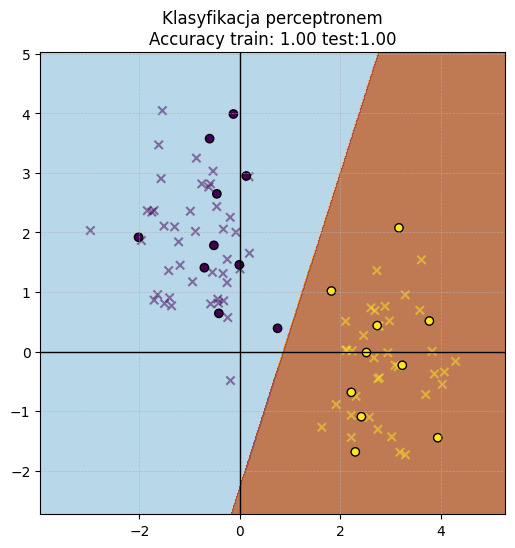

In [ ]:
def heaviside(x):
    """Funkcja Heaviside'a."""
    return np.where(x >= 0, 1, 0)

"""Perceptron z augmentacją"""
class PerceptronAug:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias=None

    def predict(self, X):
        return heaviside(np.dot(X, self.weights)+self.bias)

    def fit(self, X, y, e):
        n_samples, n_features = X.shape

        # lepiej jak losowanie wag
        self.weights = np.random.randn(n_features)
        self.bias=np.random.randn()

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                noise=np.random.randn(n_features)
                y_predicted = heaviside(np.dot(x_i+e*noise, self.weights)+self.bias)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * (x_i+e*noise)
                self.bias += update

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


def wizualizacjaAug(X_train,y_train,X_test,y_test,e):
  # Trenowanie perceptronu
  perceptron = PerceptronAug(learning_rate=1, epochs=100)
  perceptron.fit(X_train, y_train,e)
  acc_train = perceptron.accuracy(X_train, y_train)
  acc_test = perceptron.accuracy(X_test, y_test)

  # Wizualizacja wyników z kolejnymi barierami decyzyjnymi
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  plt.figure(figsize=(6, 6))

  # Ostateczna bariera decyzyjna
  Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  # Punkty danych
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='x',alpha=0.5)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o')
  plt.axhline(0, color='black', linewidth=1, linestyle='-')
  plt.axvline(0, color='black', linewidth=1, linestyle='-')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.title(f'Klasyfikacja perceptronem\nAccuracy train: {acc_train:.2f} test:{acc_test:.2f}')
  plt.show()

# Generowanie prostych danych
e=0.4
np.random.seed(100)

N=100
N_train=(4*N)//5
X = np.random.randn(N, 2)
y = np.array([1 if x[0]> e*np.random.randn() else 0 for x in X])
X+=2*np.array([y,1-y]).T

X_train=X[:N_train]
X_test=X[N_train:]
y_train=y[:N_train]
y_test=y[N_train:]


np.random.seed(None)

wizualizacjaAug(X_train,y_train,X_test,y_test,0)
wizualizacjaAug(X_train,y_train,X_test,y_test,0.3)


# Model nieliniowy

<ipython-input-6-e4bdc711e1a9>:58: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='x',alpha=0.5)


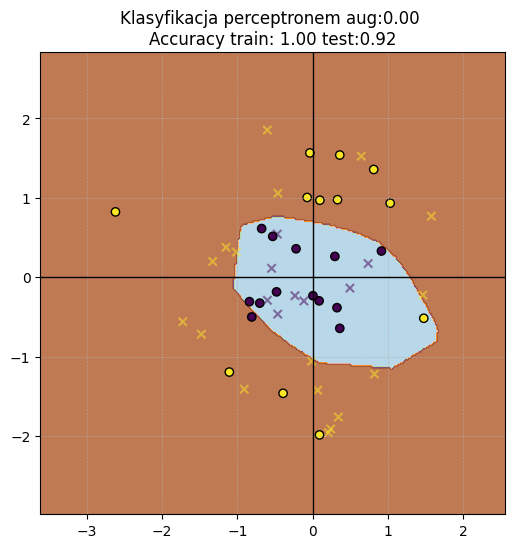

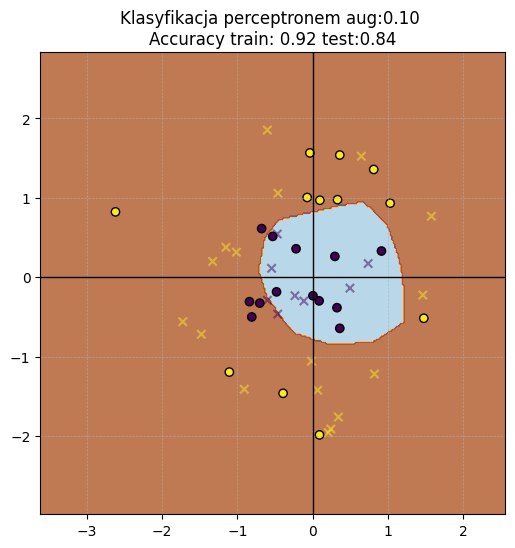

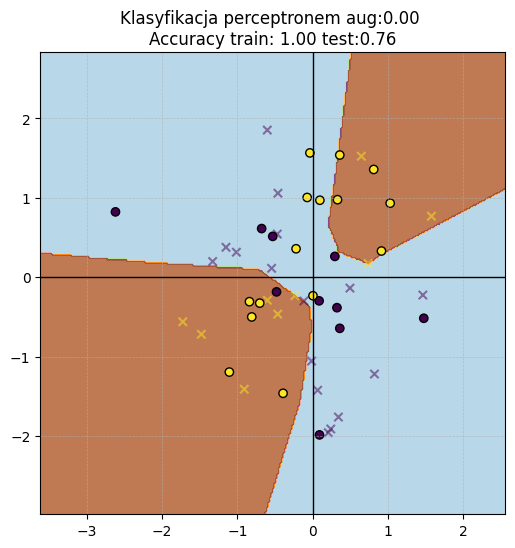

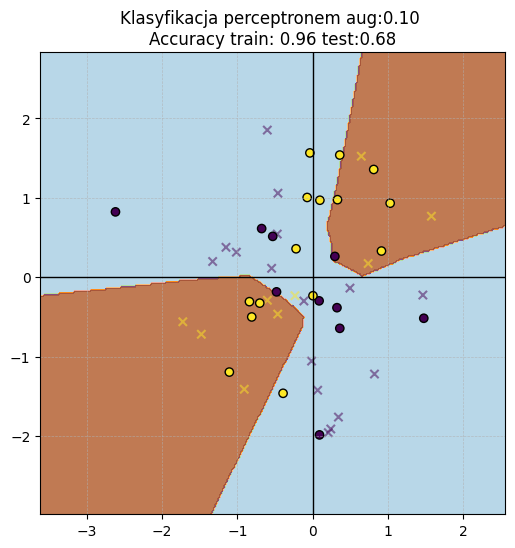

In [ ]:
# F to zanurzenie w wiekszą przestrzeń -- reprezentacja

"""Perceptron z reprezentacją i augmentacją"""
class PerceptronRep:
    def __init__(self, learning_rate=0.1, epochs=400):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias=None

    def predict(self, x, F):
        return heaviside(np.dot(F(x), self.weights) + self.bias)

    # domyślnie e=0 oznacza braj
    def fit(self, X, y, F, e=0):
        n_features = len(F(X[0]))
        self.weights = np.random.randn(n_features)
        self.bias = np.random.rand()

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                noise=np.random.randn(len(x_i))
                y_predicted = heaviside(np.dot(F(x_i+e*noise), self.weights) + self.bias)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * (F(x_i+e*noise))
                self.bias += update

    def accuracy(self, X, y, F):
        s=0
        S=0
        for idx, x_i in enumerate(X):
          s+=(heaviside(np.dot(F(x_i), self.weights) + self.bias) == y[idx])
          S+=1
        return s/S


def wizualizacjaRep(X_train,y_train,X_test,y_test, F, e=0):
  # Trenowanie perceptronu
  perceptron = PerceptronRep(learning_rate=1, epochs=100)
  perceptron.fit(X_train, y_train, F, e)
  acc_train = perceptron.accuracy(X_train, y_train, F)
  acc_test = perceptron.accuracy(X_test, y_test, F)

  # Wizualizacja wyników z kolejnymi barierami decyzyjnymi
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  plt.figure(figsize=(6, 6))

  # Ostateczna bariera decyzyjna
  Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()],F)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  # Punkty danych
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='x',alpha=0.5)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o')
  plt.axhline(0, color='black', linewidth=1, linestyle='-')
  plt.axvline(0, color='black', linewidth=1, linestyle='-')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.title(f'Klasyfikacja perceptronem aug:{e:.2f} \nAccuracy train: {acc_train:.2f} test:{acc_test:.2f}')
  plt.show()


# Generowanie prostych danych
e=0.2
np.random.seed(42)

N=50
N_train=N//2
X = np.random.randn(N, 2)

dim=20
W = np.random.randn(2, dim)  # Macierz zanurzenia
a=np.random.randn(dim)

def relu(x):
    return np.maximum(0, x)

def F(X):
  return relu(a+np.dot(X,W))

# koło
y = np.array([1 if x[0]**2 + x[1]**2>1+np.random.normal(loc=0, scale=e) else 0 for x in X])

X_train=X[:N_train]
X_test=X[N_train:]
y_train=y[:N_train]
y_test=y[N_train:]

np.random.seed(None)

wizualizacjaRep(X_train,y_train,X_test,y_test,F,0)
wizualizacjaRep(X_train,y_train,X_test,y_test,F,0.1)

# XOR data
y = np.array([1 if x[0]*x[1]> np.random.normal(loc=0, scale=e) else 0 for x in X])

X_train=X[:N_train]
X_test=X[N_train:]
y_train=y[:N_train]
y_test=y[N_train:]

np.random.seed(None)

wizualizacjaRep(X_train,y_train,X_test,y_test,F,0)
wizualizacjaRep(X_train,y_train,X_test,y_test,F,0.1)



# Podstawowe typy augmentacji

* dodajemy losowy szum
* w sposób losowy zerujemy pewne współrzędne
* mix-up

Bardzo często stosuje się metodę *mix-up* [Zhang et al. (2017)].
MixUp to technika augmentacji danych stosowana w trenowaniu sieci neuronowych, polegająca na mieszaniu par przykładów treningowych oraz ich etykiet.

Dla dwóch losowych próbek $(x_i, y_i)$ i $(x_j, y_j)$, generuje się nową próbkę według wzorów:
\begin{equation}
\tilde{x} = \lambda x_i + (1 - \lambda) x_j
\end{equation}
\begin{equation}
\tilde{y} = \lambda y_i + (1 - \lambda) y_j
\end{equation}
gdzie $\lambda \in [0,1]$ jest losowaną wartością z rozkładu Beta.

- Redukuje overfitting.
- Poprawia zdolności modelu do generalizacji.
- Sprawia, że sieć jest bardziej odporna na błędnie oznaczone dane.


In [ ]:
import numpy as np
import torch

def mixup_data(x, y, alpha=1.0):
    """Zastosowanie MixUp do danych wejściowych x i etykiet y."""
    if alpha > 0:
        lambda_ = np.random.beta(alpha, alpha)
    else:
        lambda_ = 1.0

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lambda_ * x + (1 - lambda_) * x[index, :]
    mixed_y = lambda_ * y + (1 - lambda_) * y[index]

    return mixed_x, mixed_y


## Augmentacje dla obrazów

Najczęściej stosowane transformacje geometryczne:
-  **Obrót (Rotation)** – losowy obrót obrazu o określony kąt (np. $\pm 30^\circ$).
- **translacja (Translation)** – przesuwanie obrazu w poziomie lub pionie.
- **Skalowanie (Scaling)** – powiększanie lub pomniejszanie obrazu.
- **Odbicie (Flipping)** – lustrzane odbicie w pionie lub poziomie.
- **Przycinanie (Cropping)** – losowe wycinanie fragmentu obrazu (Random Crop) lub centralne przycięcie.

Używa się też nieliniowych transformacji, na przykład Elastic Transform.

Zmiana jasności, kontrastu, nasycenie, etc.

Często dodaje się rozmycie i szum:
- **Gaussian Noise** – dodanie losowego szumu do obrazu.
- **Rozmycie (Blur)** – np. rozmycie Gaussa, które może symulować nieostre zdjęcia.

Oprócz tego często używa się
- **Cutout (Random Erasing)** – losowe zamalowywanie fragmentów obrazu, aby zwiększyć odporność modelu.
- **MixUp** – mieszanie dwóch obrazów wraz z ich etykietami.
- **CutMix** – wycinanie fragmentu jednego obrazu i wklejanie go do innego.


